# 1.Import the Necessary Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind
import seaborn as  sns 
sns.set(color_codes=True)
%matplotlib notebook
%matplotlib inline

# Read the data as a data frame

In [2]:
insdata=pd.read_csv('insurancedataset.csv')

In [3]:
insdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking for Missing values

In [13]:
insdata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 5 point summary of numerical attributes

In [10]:
insdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
insdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data type of each attribute

In [7]:
data_type = insdata.dtypes
print(data_type)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


# Shape of each attribute

<IPython.core.display.Javascript object>


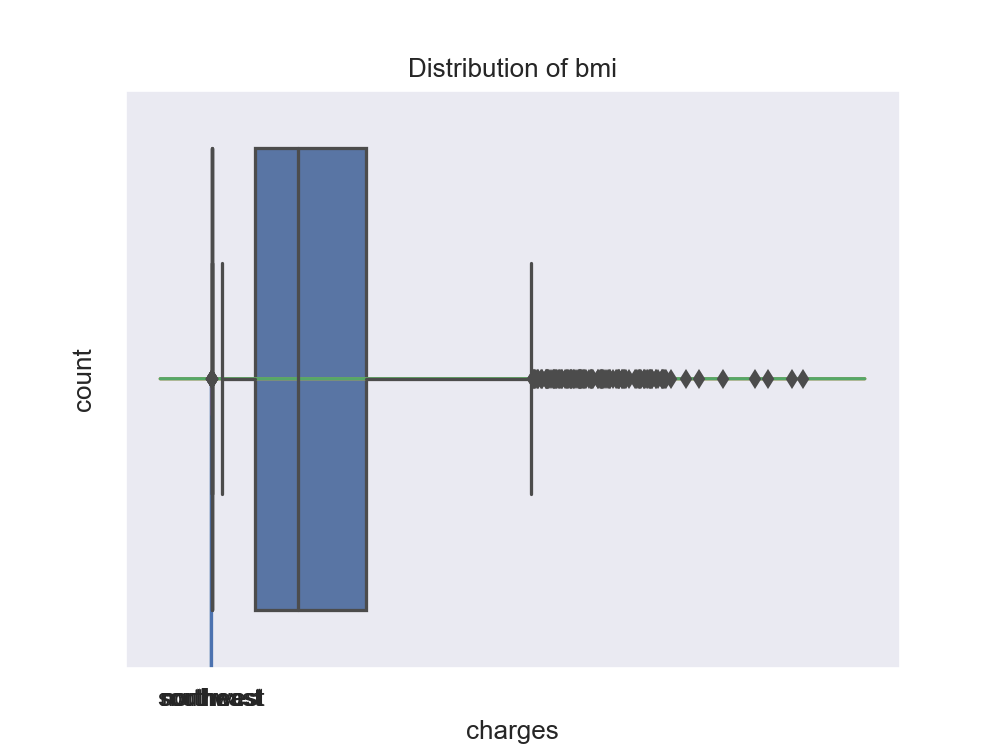

Text(0.5, 1.0, 'Histogram of customers Children count')

In [8]:
sns.distplot(insdata['children'])
plt.title('Histogram of customers Children count')

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


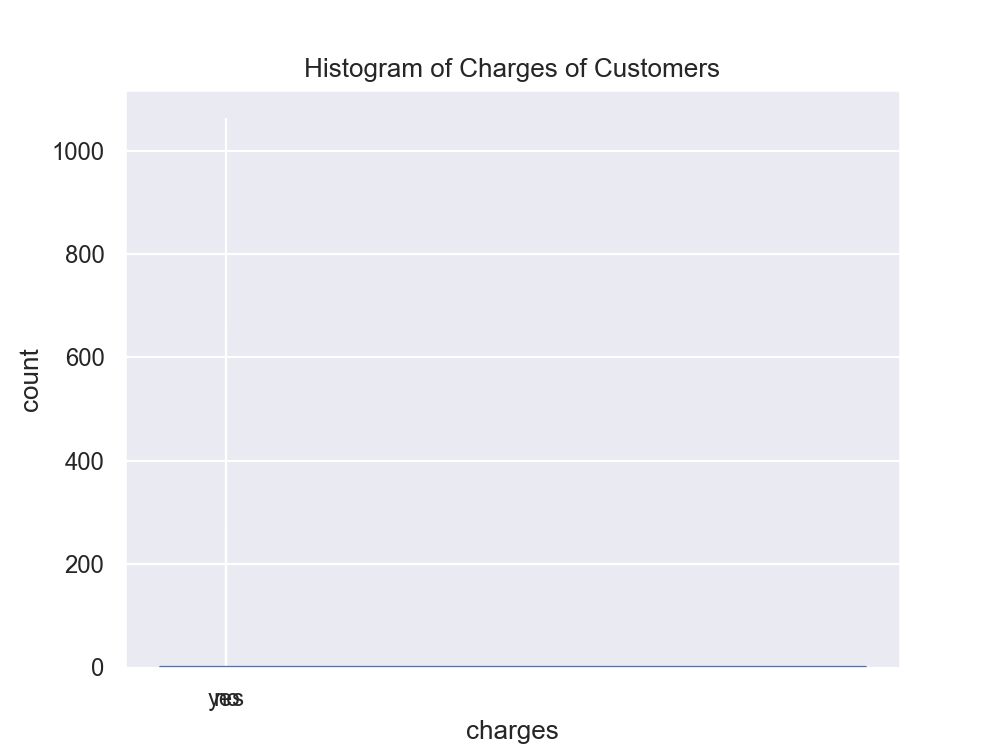

Text(0.5, 1.0, 'Histogram of gender')

In [14]:
sns.countplot(insdata['sex'])
plt.title('Histogram of gender')

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Smoker & Non-Smoker Count')

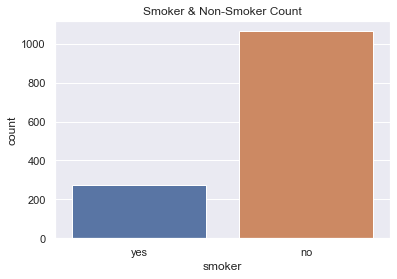

In [31]:
sns.countplot(insdata['smoker'])

plt.title('Smoker & Non-Smoker Count')

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


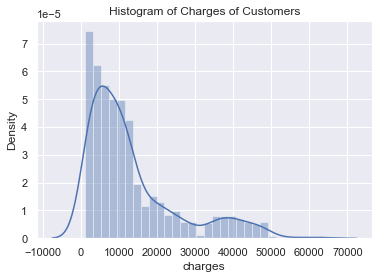

In [32]:
sns.distplot(insdata['charges'])
plt.title('Histogram of Charges of Customers')
plt.show()

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


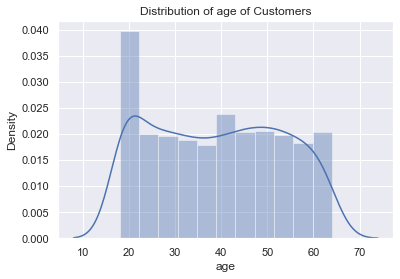

In [33]:
sns.distplot(insdata['age'])
plt.title('Distribution of age of Customers')
plt.show()

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


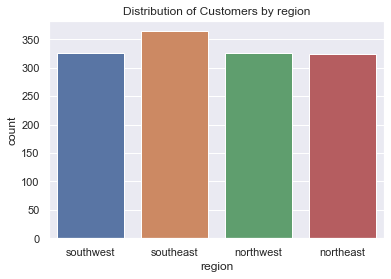

In [34]:
sns.countplot(insdata['region'])
plt.title('Distribution of Customers by region')
plt.show()

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of bmi')

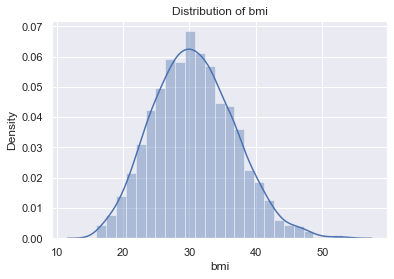

In [35]:
sns.distplot(insdata['bmi'])
plt.title('Distribution of bmi')

# Checking for Outliers in Continuos data

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

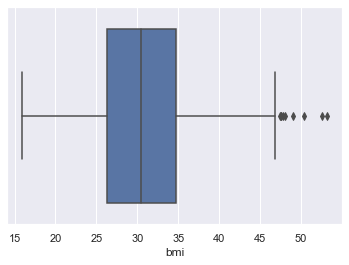

In [36]:
sns.boxplot(insdata['bmi'])

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

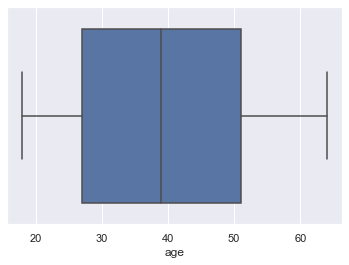

In [37]:
sns.boxplot(insdata['age'])

C:\Users\91934\anaconda3\envs\el-dorado\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

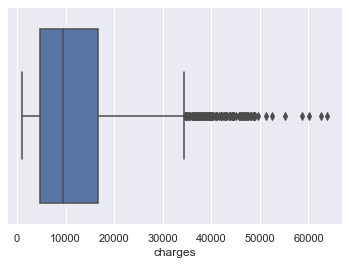

In [45]:
sns.boxplot(insdata['charges'])

# Pair plot that includes all the columns of the dataframe

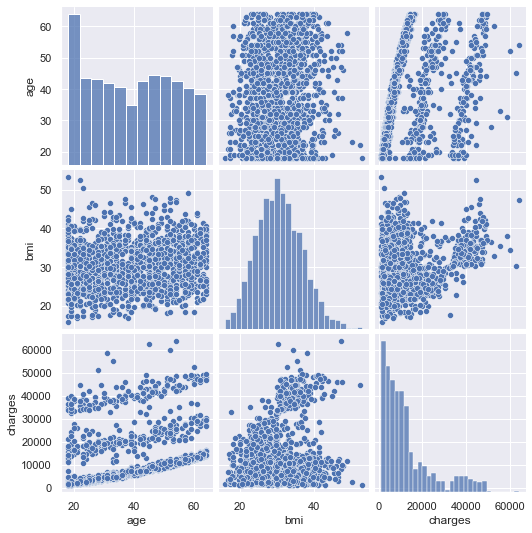

In [46]:
sns.pairplot(insdata[['age','bmi','charges','smoker','sex']])

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

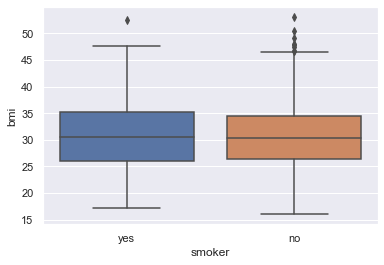

In [47]:
sns.boxplot(x='smoker',y='bmi',data=insdata)

<AxesSubplot:xlabel='sex', ylabel='bmi'>

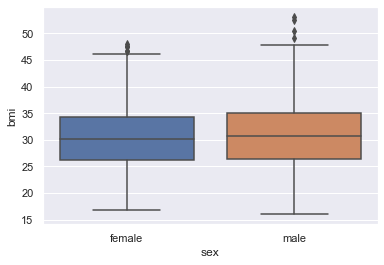

In [48]:
sns.boxplot(x='sex',y='bmi',data=insdata)

<AxesSubplot:xlabel='sex', ylabel='charges'>

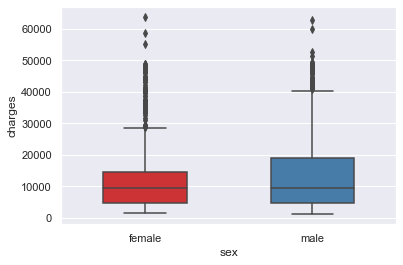

In [49]:
sns.boxplot(x='sex',y='charges',data=insdata, palette="Set1",width=0.5)

<AxesSubplot:xlabel='children', ylabel='count'>

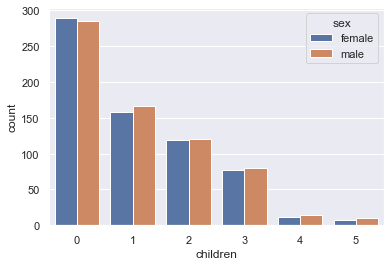

In [50]:
sns.countplot(x='children',hue=insdata['sex'],data=insdata)

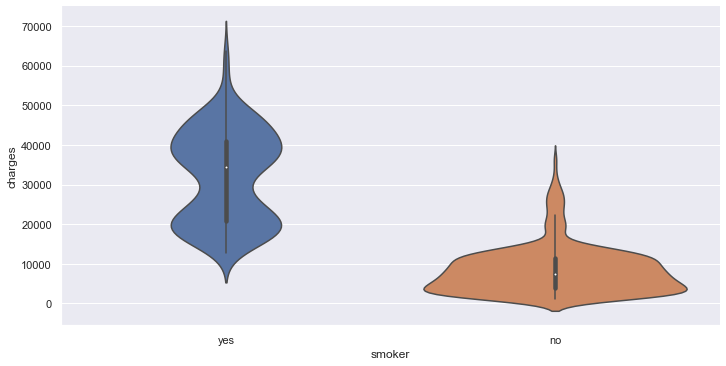

In [61]:
sns.catplot(x='smoker',y='charges',data=insdata,kind='violin',height=5,aspect=2)

<IPython.core.display.Javascript object>


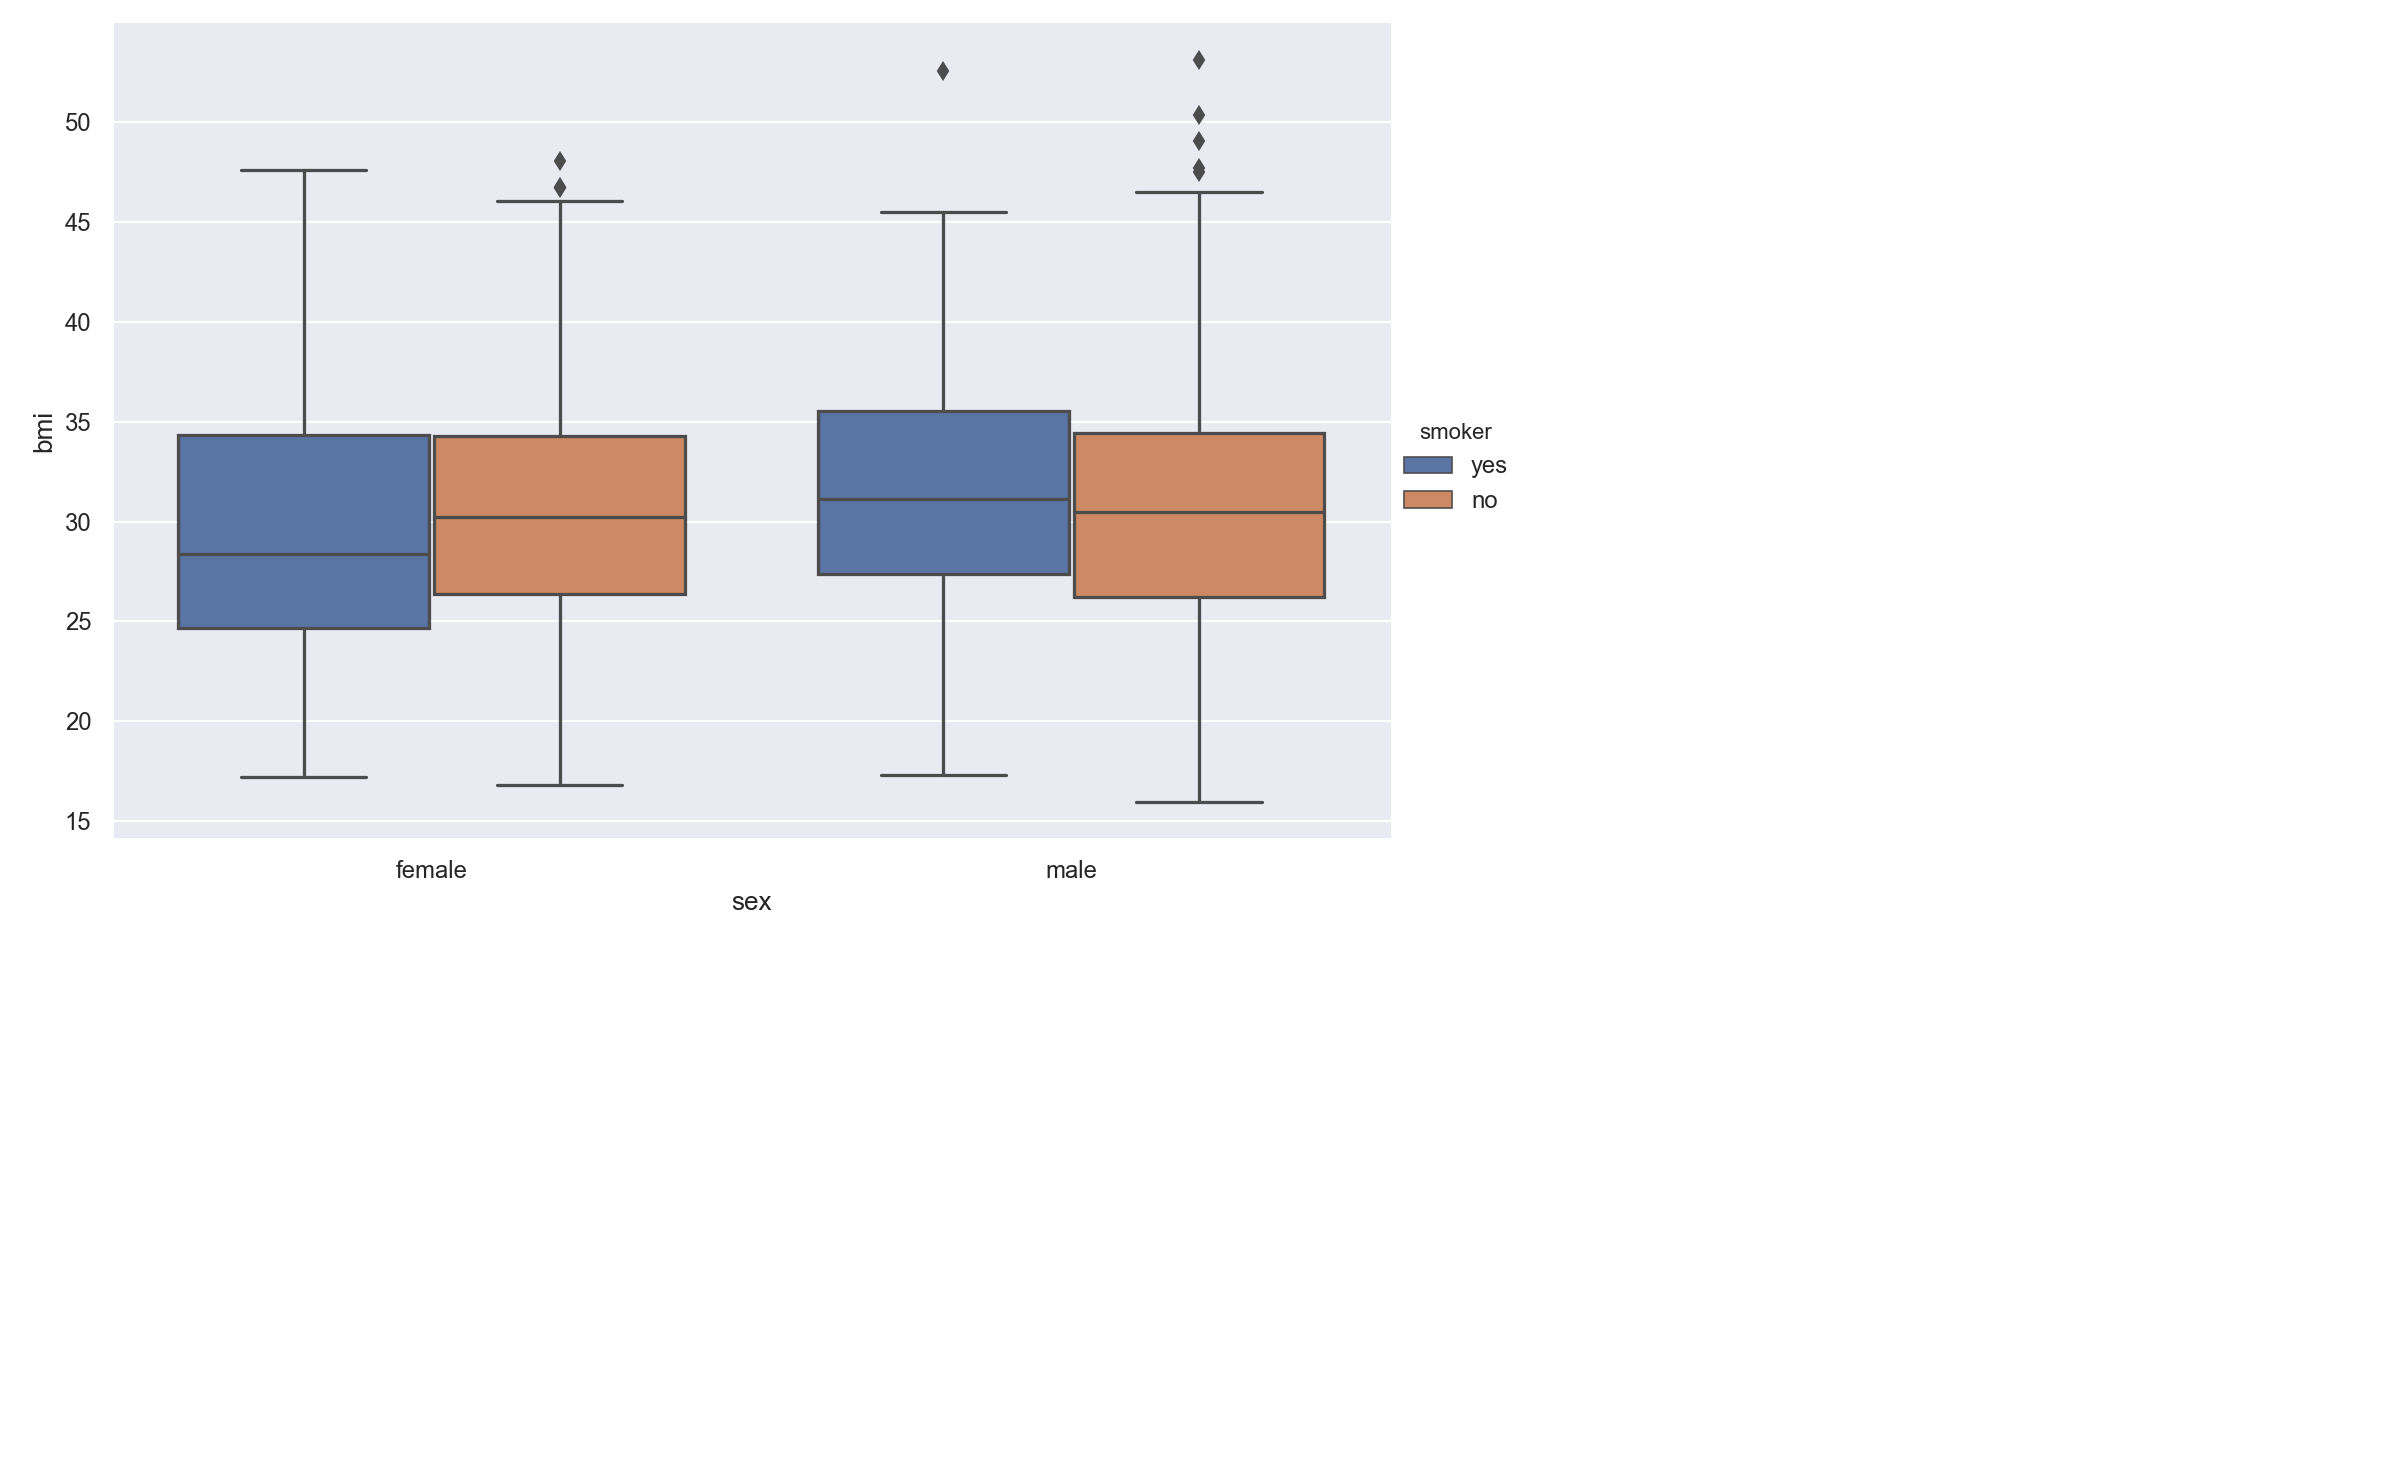

In [27]:
sns.catplot(x='sex',y='bmi',hue='smoker',data=insdata,kind='box',height=6,aspect=1.5)

In [29]:
# **seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, 
# n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, 
# orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False,
# facet_kws=None, **kwargs)**

<IPython.core.display.Javascript object>


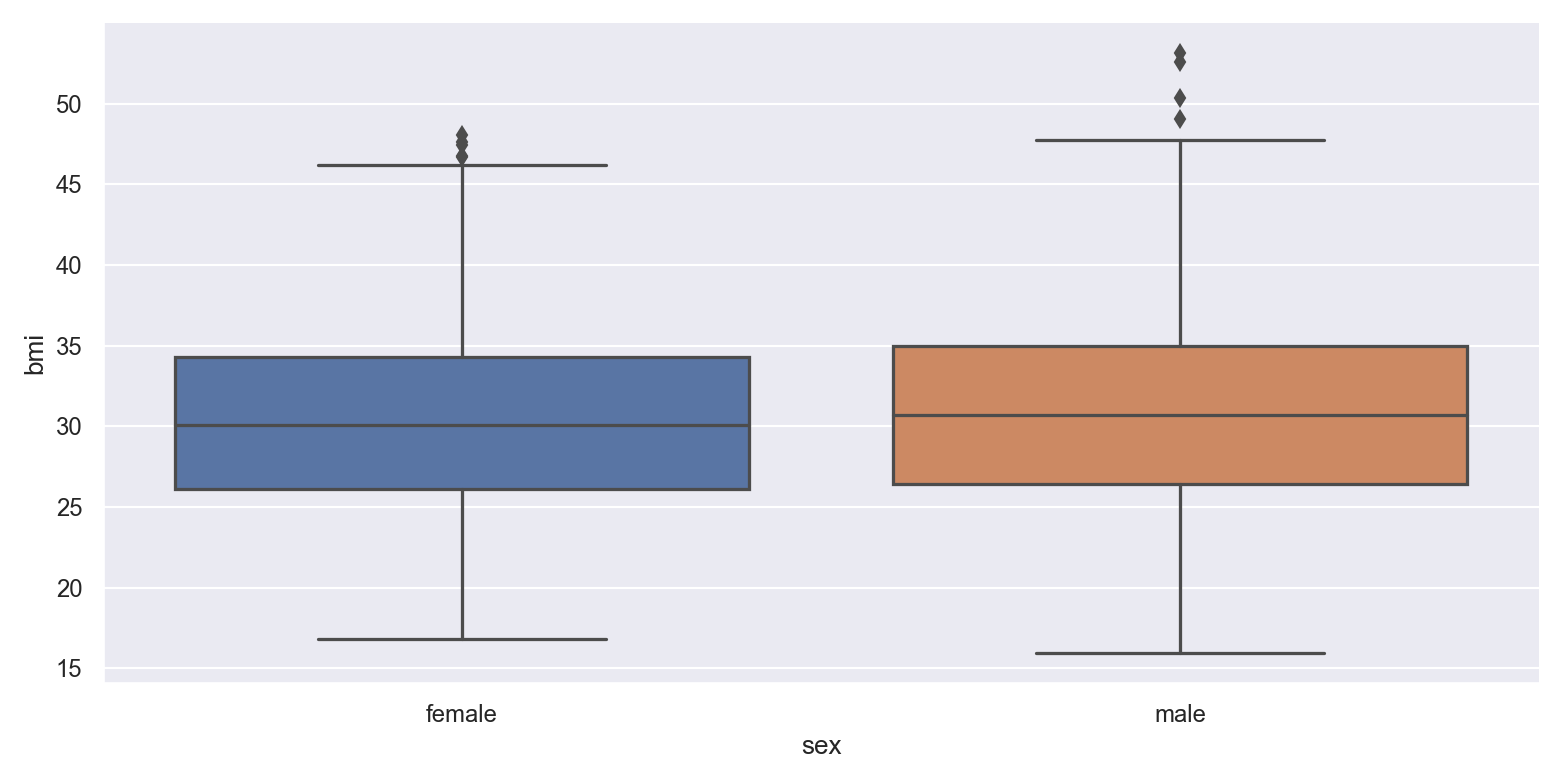

In [30]:
sns.catplot(x='sex',y='bmi',data=insdata,kind='box',height=5,aspect=2)

In [31]:
sns.catplot(x='children',y='bmi',hue=insdata['region'],data=insdata,kind='strip',height=5,aspect=2)

<IPython.core.display.Javascript object>

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

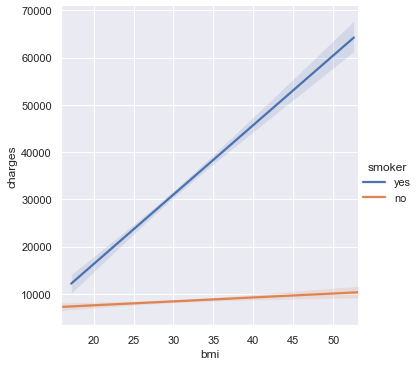

In [68]:
sns.lmplot(x='bmi',y='charges',hue = 'smoker',data=insdata,scatter = False)

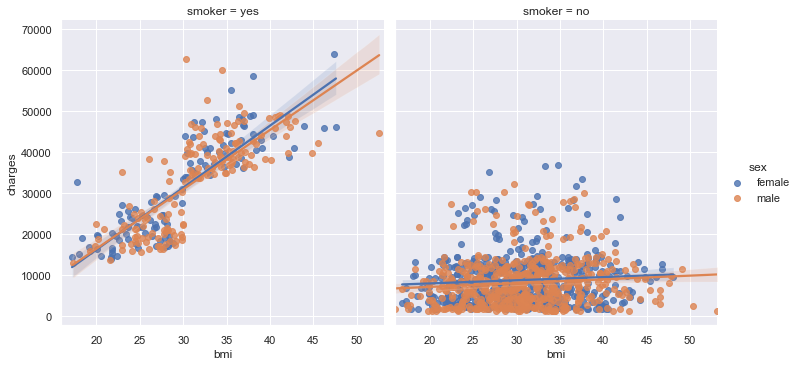

In [62]:
sns.lmplot(x='bmi',y='charges',data=insdata,hue='sex',col='smoker')

# #Conclusion 
From lm plots we can observe customers having smoking habit have high correlation between bmi and charges and in customers who 
dont have smoking habit bmi and charges are less correlated

# Comparison Of Charges of Smoking and Non-smoking Persons

*𝐻0 : Insurance  Charges are Equal  (𝜇1  =  𝜇2)

*𝐻𝐴 : Insurance Charges are not equal


In [34]:
smoker_charges=insdata[insdata['smoker']=='yes']['charges']
Non_smoker_charges=insdata[insdata['smoker']=='no']['charges']
v1,v2=np.mean(smoker_charges),np.mean(Non_smoker_charges)
print(v1,v2)
insdata.smoker.value_counts()

32050.23183153285 8434.268297856199


no     1064
yes     274
Name: smoker, dtype: int64

In [35]:
t_statistic,p_value=ttest_ind(smoker_charges,Non_smoker_charges)
print(t_statistic,p_value)
if p_value > 0.05:
    print("\n The p-value is %.32f. we fail to reject the null" % p_value)
else:
    print("\n The p-value is %.32f. We reject the null and agree with alternative hypothesis" % p_value)

46.664921172723716 8.271435842177219e-283

 The p-value is 0.00000000000000000000000000000000. We reject the null and agree with alternative hypothesis


# Comparison of bmi of male and female
H0 : Means are equal(bmi of male and female are equal)

Ha: Means are different

In [36]:
male_bmi=insdata[insdata['sex']=='male']['bmi']
female_bmi=insdata[insdata['sex']=='female']['bmi']
v1,v2=np.var(male_bmi),np.var(female_bmi)
print(v1,v2)
insdata.sex.value_counts()

37.6491607363954 36.49917703379856


male      676
female    662
Name: sex, dtype: int64

In [37]:
t_statistic,p_value=ttest_ind(male_bmi,female_bmi)
print(t_statistic,p_value)
if p_value > 0.05:
    print("\n The p-value is %.32f. we fail to reject the null and bmi of male and female are similar" % p_value)
else:
    print("\n The p-value is %.32f. We reject the null and agree with alternative hypothesis" % p_value)

1.696752635752224 0.08997637178984932

 The p-value is 0.08997637178984932426750731337961. we fail to reject the null and bmi of male and female are similar


# 'sex' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers in the female population is significantly less than it is in the male population

#### Ho : The proportions are equal
#### Ha = The two proportions are not equal

In [38]:
female_smokers = insdata[insdata['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = insdata[insdata['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = insdata.sex.value_counts()[1] # number of females in the data
n_males = insdata.sex.value_counts()[0] #number of males in the data
print([female_smokers, n_females] , [male_smokers, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 662] [159, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [ ]:
*Are the proportions of smokers in both genders statsistically significant

In [23]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


# Comparison of bmi across women with no children,one child and two Children

In [25]:
fe_with_children=insdata[insdata['sex']=='female'][['children','bmi']]

In [26]:
no_child=fe_with_children[fe_with_children['children']==0]['bmi']
one_child=fe_with_children[fe_with_children['children']==1]['bmi']
two_child=fe_with_children[fe_with_children['children']==2]['bmi']

In [27]:
bmi_analysis = pd.DataFrame()

data1=pd.DataFrame({'children_count': 'no_child', 'bmi':no_child})
data2=pd.DataFrame({'children_count': 'one_child', 'bmi':one_child})
data3= pd.DataFrame({'children_count': 'two_child', 'bmi':two_child})

bmi_analysis = bmi_analysis.append(data1)
bmi_analysis = bmi_analysis.append(data2)
bmi_analysis = bmi_analysis.append(data3)

Text(0.5, 1.0, 'BMI')

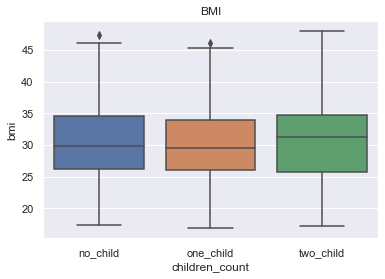

In [28]:
sns.boxplot(x = "children_count", y = "bmi", data = bmi_analysis)
plt.title('BMI')

In [29]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children_count', data = bmi_analysis).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                      sum_sq     df         F    PR(>F)
children_count     24.590123    2.0  0.334472  0.715858
Residual        20695.661583  563.0       NaN       NaN


With P-value of 0.715858 we fail to reject the null(Means are Equal) the distribution is same in case of women with o children,one child and two children
# We fail to reject the Null 

In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(bmi_analysis['bmi'], bmi_analysis['children_count']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 no_child one_child  -0.3089 0.8494 -1.7186 1.1008  False
 no_child two_child   0.2883 0.8942 -1.2636 1.8402  False
one_child two_child   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------------
